In [1]:
# importar livrarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("titanic.csv")
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# dados com valores em falta
missing_data = df.isnull().sum()
print(missing_data)
df.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Exclusao da coluna cabin do dataframe
df.drop(columns='Cabin', inplace=True)

In [5]:
# Atualizacao os valores ausentes na coluna age para mulheres com o valor mediano
female_median_age = df[df['Sex'] == 'female']['Age'].median()
df.loc[(df['Sex'] == 'female') & (df['Age'].isnull()), 'Age'] = female_median_age
print("Mediana da idade das mulheres:", female_median_age)

Mediana da idade das mulheres: 27.0


In [6]:
# Atualizacao os valores ausentes na coluna age para homens, usando valor mediano de todos os passageiros masculinos
male_median_age = df[df['Sex'] == 'male']['Age'].median()
df.loc[(df['Sex'] == 'male') & (df['Age'].isnull()), 'Age'] = male_median_age
print("Mediana da idade das mulheres:", male_median_age)

Mediana da idade das mulheres: 29.0


In [8]:
# Descobrir o valor mais comum da coluna Embarked
most_common_embarked = df['Embarked'].mode()[0]

# Preencher valores ausentes com esse valor
df['Embarked'] = df['Embarked'].fillna(most_common_embarked)

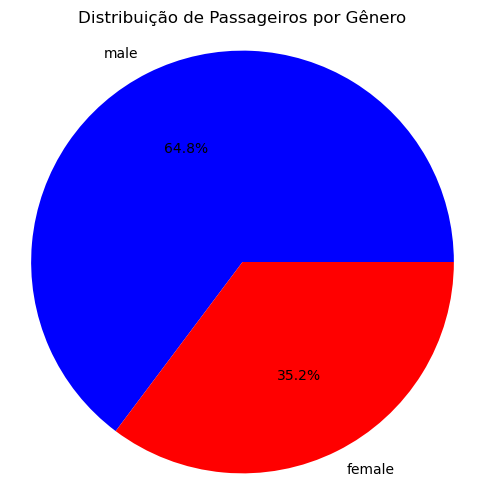

In [9]:
# gráfico distribuição de passageiros por gênero
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Distribuição de Passageiros por Gênero')
plt.axis('equal')  # Para manter o círculo
plt.show()

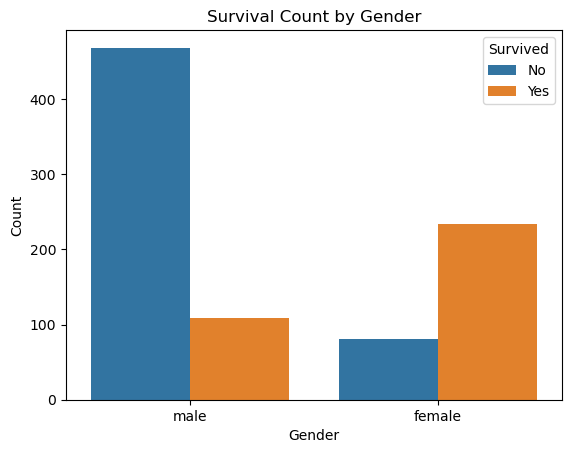

In [10]:
# distribuição de passageiros por gênero (Sex) e se eles sobreviveram (Survived)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

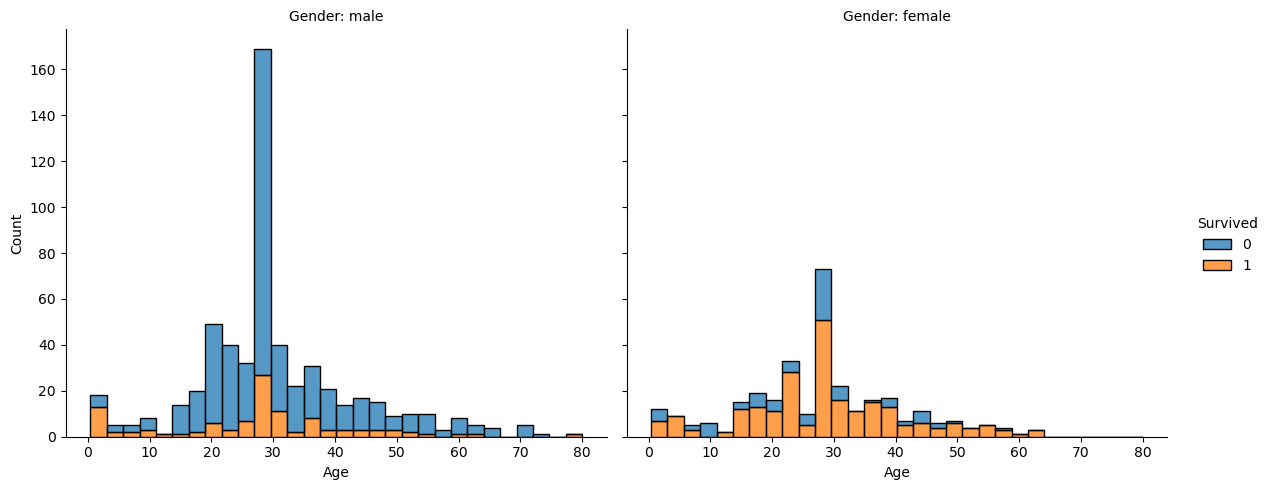

In [11]:
# gráfico displot para visualizar a distribuição de passageiros pela idade
g = sns.displot(
    data=df, 
    x='Age', 
    col='Sex', 
    hue='Survived', 
    kind='hist', 
    multiple='stack', 
    bins=30,
    height=5,
    aspect=1.2
)
g.set_titles("Gender: {col_name}")
plt.show()

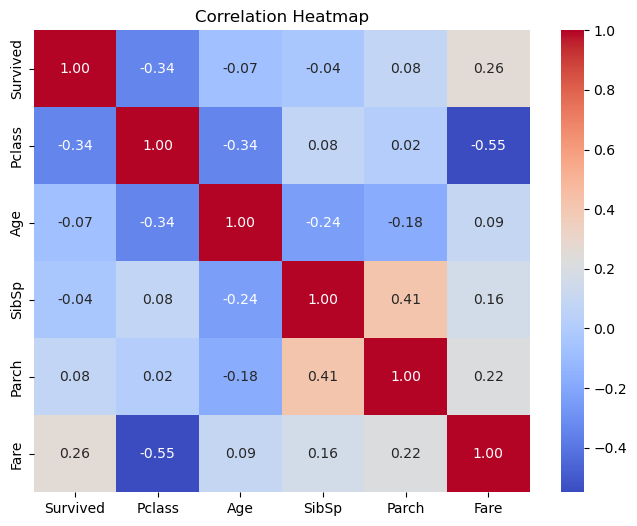

In [12]:
# correlação entre as diferentes colunas
# Coluna relevantes
corr_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_mtx = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Média da idade
media_idade = df['Age'].mean()

# Idade mínima
idade_minima = df['Age'].min()

# Idade máxima
idade_maxima = df['Age'].max()

# Exibir os resultados
print(f"Média da idade: {media_idade:.2f} anos")
print(f"Idade mínima: {idade_minima} anos")
print(f"Idade máxima: {idade_maxima} anos")

Média da idade: 29.44 anos
Idade mínima: 0.42 anos
Idade máxima: 80.0 anos


In [14]:
passageiros_por_classe = df.groupby('Pclass').size()

print("Número de passageiros por classe:")
print(passageiros_por_classe)

Número de passageiros por classe:
Pclass
1    216
2    184
3    491
dtype: int64


In [15]:
# Contar número de passageiros que sobreviveram (Survived = 1)
num_sobreviventes = df[df['Survived'] == 1].shape[0]

print(f"Número de sobreviventes: {num_sobreviventes}")

Número de sobreviventes: 342


In [16]:
contagem_sibsp = df['SibSp'].value_counts().sort_index()

print("Número de passageiros por quantidade de irmãos/cônjuges a bordo:")
print(contagem_sibsp)

Número de passageiros por quantidade de irmãos/cônjuges a bordo:
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


In [17]:
contagem_parch = df['Parch'].value_counts().sort_index()

print("Número de passageiros por quantidade de pais/filhos a bordo:")
print(contagem_parch)

Número de passageiros por quantidade de pais/filhos a bordo:
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


In [18]:
# Average fare
average_fare = df['Fare'].mean()

# Minimum fare
min_fare = df['Fare'].min()

# Maximum fare
max_fare = df['Fare'].max()

# Print results
print(f"Average fare: ${average_fare:.2f}")
print(f"Minimum fare: ${min_fare:.2f}")
print(f"Maximum fare: ${max_fare:.2f}")

Average fare: $32.20
Minimum fare: $0.00
Maximum fare: $512.33


In [20]:
# Contar número de passageiros por porto de embarque
portos_embarque = df['Embarked'].value_counts()

print("Número de passageiros por porto de embarque:")
print(portos_embarque)

Número de passageiros por porto de embarque:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [21]:
# Taxa de sobrevivência global
taxa_sobrevivencia = df['Survived'].mean() * 100

print(f"Taxa de sobrevivência global: {taxa_sobrevivencia:.2f}%")

Taxa de sobrevivência global: 38.38%


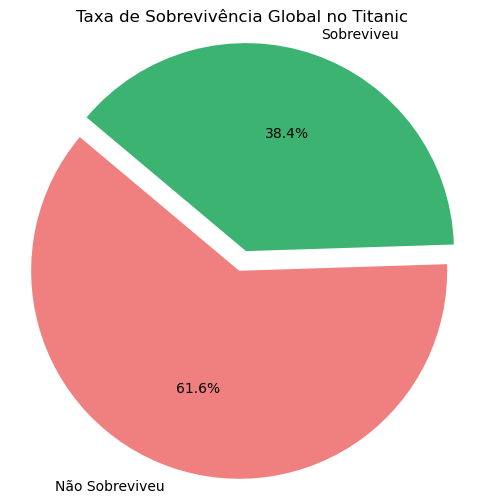

In [22]:
import matplotlib.pyplot as plt

# Contagem de sobreviventes e não sobreviventes
sobreviventes = df['Survived'].value_counts()

# Rótulos para o gráfico
labels = ['Não Sobreviveu', 'Sobreviveu']

# Cores personalizadas (opcional)
colors = ['lightcoral', 'mediumseagreen']

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sobreviventes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Taxa de Sobrevivência Global no Titanic')
plt.axis('equal')  # Garantir que seja um círculo
plt.show()

C:\Users\denis\AppData\Local\Temp\ipykernel_15464\4237568423.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeRange')['Survived'].mean()


AgeRange
0-10     0.593750
11-20    0.382609
21-30    0.334152
31-40    0.445161
41-50    0.383721
51-60    0.404762
61-70    0.235294
71-80    0.200000
Name: Survived, dtype: float64


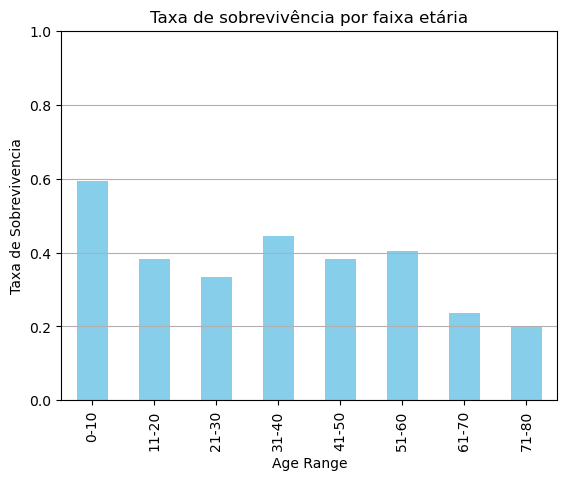

In [27]:
# Definir rotulos de idade
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Criar a coluna AgeRange
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Calcular a taxa de sobrevivência por AgeRange
survival_by_age = df.groupby('AgeRange')['Survived'].mean()

# Print survival rate by age range
print(survival_by_age)

# Plot survival rate by age range
survival_by_age.plot(kind='bar', color='skyblue')
plt.title('Taxa de sobrevivência por faixa etária')
plt.xlabel('Age Range')
plt.ylabel('Taxa de Sobrevivencia')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [24]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


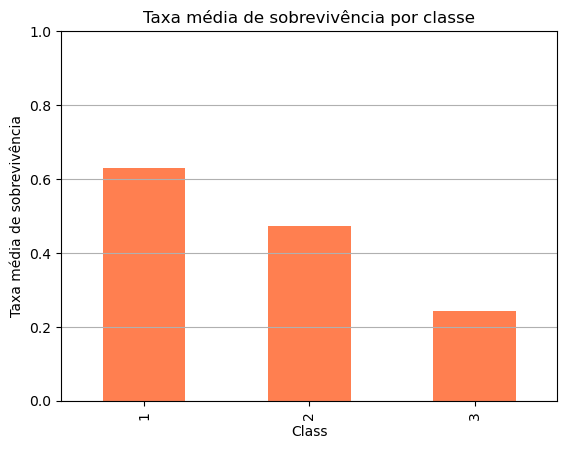

In [26]:
survival_by_class.plot(kind='bar', color='coral')
plt.title('Taxa média de sobrevivência por classe')
plt.xlabel('Class')
plt.ylabel('Taxa média de sobrevivência')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [28]:
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


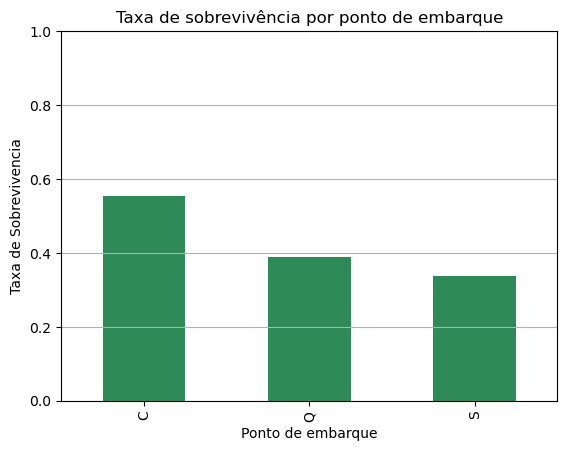

In [29]:
survival_by_embarked.plot(kind='bar', color='seagreen')
plt.title('Taxa de sobrevivência por ponto de embarque')
plt.xlabel('Ponto de embarque')
plt.ylabel('Taxa de Sobrevivencia')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [32]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 para incluir o próprio passageiro

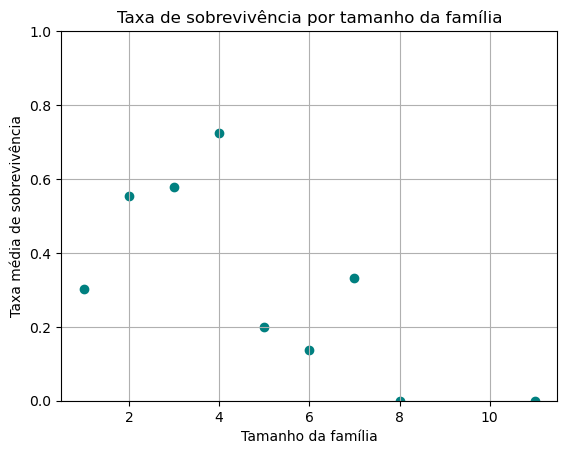

In [34]:
# O nr de familias a bordo (SibSp e Parch) aumentou a probabilidade de sobrevivência?
survival_by_family = df.groupby('FamilySize')['Survived'].mean()

# Plot
plt.scatter(survival_by_family.index, survival_by_family.values, color='teal')
plt.title('Taxa de sobrevivência por tamanho da família')
plt.xlabel('Tamanho da família')
plt.ylabel('Taxa média de sobrevivência')
plt.ylim(0, 1)
plt.grid(True)
plt.show()